In [1]:
%matplotlib inline

import pandas
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from matplotlib import rc, cm
from numpy import log, inf, nan 

In [2]:
df = pandas.read_csv( '../data_sets/experimental_data/thermo_paper_data_set.csv', index_col=0 ) 
df = df.sort_values( 'sequence_pos' ) 

## Figure 1: overview

In [3]:
## Miscellaneous for paper 

### Number of uniq seq positions mutated 

len( df.sequence_pos.unique() ) 

68

In [4]:
# figure 1: overview 

s = '+'.join( [ i for i in df.sequence_pos.dropna().astype( int ).astype( str ) ] ) 
print 'select all_mutants, resi', s 

select all_mutants, resi 12+14+15+16+16+17+17+18+19+19+19+19+32+34+52+72+76+91+101+119+119+119+120+120+120+121+154+163+163+163+163+163+164+164+164+166+167+167+171+171+175+177+177+177+178+178+192+218+220+220+220+220+220+221+222+222+222+222+222+222+236+240+240+240+240+244+244+249+261+293+293+293+293+293+294+294+294+295+295+296+296+298+300+313+315+315+323+323+325+325+325+325+325+325+329+331+341+343+352+353+354+355+358+362+373+379+379+399+399+399+399+399+400+403+404+404+406+406+407+407+407+407+407+407+409+415+415+423


In [5]:
# mutants that don't express 

no_express = df[( df.expression < 1 )]

In [6]:
ddg = pandas.read_csv( '../data_sets/features/ddg_monomer.csv', index_col=0 )

## Figure 2: heat map of expression and Tm for each mutant 

Here, we will display the values as a two-column heat map. 

In [7]:
heatmap_cols = [ 'expression', 'tm' ] 
heatmap_data = df[ heatmap_cols ].copy()

heatmap_data['delta_tm'] = heatmap_data.tm - 39.6
heatmap_data['expression'] = heatmap_data.expression 

img_cols = [ 'expression', 'delta_tm' ]
heatmap = heatmap_data[ img_cols ].copy() 
heatmap.loc[ 'BglB' ] = ( 1, 0 )  

print heatmap.tail( 5 ) 

        expression  delta_tm
mutant                      
W409Y            1      -3.0
F415A            1       NaN
F415N            1       NaN
E423S            1       0.3
BglB             1       0.0


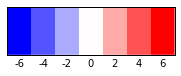

In [8]:
# heat map 

# legend 

from numpy import array 

my_scale = [ -6, -4, -2, 0, 2, 4, 6 ] 

plt.figure( figsize=( 3,20 ) ) 
plt.imshow( array( [ my_scale, my_scale ] ), interpolation='none', cmap='bwr', vmin=-6, vmax=6 )
plt.xticks( range( 7 ), my_scale ) 
plt.yticks( [] ) 
plt.tick_params( length=0 ) 
plt.savefig( 'heatmap/bwr_color_legend.pdf' )

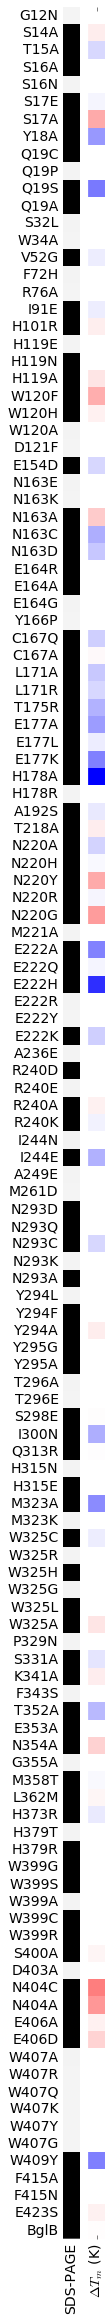

In [9]:
# expression and tm 

plt.figure( figsize=(1,40) )
plt.subplots_adjust( left=0.1, right=1.1 )

font = { 'size': 14 }
rc('font', **font)
rc('axes', edgecolor='none')

plt.subplot( 1, 3, 1 )
plt.imshow( heatmap[ ['expression'] ], cmap='Greys', interpolation='none', vmin=-.1 ) 
plt.tick_params( length=0 ) 
plt.xticks( [ 0 ], [ 'SDS-PAGE' ], rotation='vertical' )
plt.yticks( range( len( heatmap.index ) ), heatmap.index )

plt.subplot( 1, 3, 2 )
plt.imshow( heatmap[ ['delta_tm'] ], interpolation='none', cmap='bwr', vmin=-6, vmax=6 ) 
plt.xticks( [ 0 ], [ '$\Delta T_m$ (K)' ], rotation='vertical' ); plt.yticks( [] ) 

#plt.show() 
plt.savefig( 'heatmap/expression_tm_heatmap.tiff', dpi=600, bbox_inches='tight' ) 

In [10]:
# conservation 

dat = pandas.read_csv( 'alignments/logo-data-bagel-aligned.txt', sep='\s+' ) 
dat['sequence_pos'] = dat.index + 1 
dat

,amino_acid,#,A,C,D,E,F,G,H,I,...,T,V,W,Y,Entropy,Low,High,Weight,1,sequence_pos
0,n,200,31,4,59,25,3,38,18,16,...,71,7,2,8,0.8400,0.7718,0.9083,0.8747,2,1
1,t,216,62,1,132,225,9,17,14,22,...,37,17,1,17,0.4989,0.4489,0.5489,0.8848,3,2
2,f,228,57,7,26,15,12,44,14,19,...,26,18,0,24,0.1707,0.1133,0.2282,0.3999,4,3
3,i,229,36,4,104,30,2,19,22,6,...,55,22,0,3,0.3170,0.2546,0.3795,0.4074,5,4
4,f,249,0,1,0,0,557,0,1,6,...,3,3,3,3,2.3627,2.2618,2.4636,0.4320,6,5
5,p,257,10,1,10,3,0,19,1,2,...,3,0,0,0,2.0515,1.9275,2.1755,0.3482,7,6
6,a,264,62,0,60,78,0,7,6,0,...,16,2,0,0,0.6239,0.5524,0.6953,0.3086,8,7
7,t,274,11,1,546,56,0,473,35,0,...,28,4,4,4,1.1410,1.0836,1.1984,0.9736,9,8
8,f,285,2,0,1,1,1509,1,0,8,...,2,0,0,2,3.0300,2.9819,3.0780,0.9786,10,9
9,m,320,26,2,2,10,38,6,11,140,...,56,199,52,29,0.9259,0.8560,0.9959,0.9811,11,10


In [11]:
dat.columns

Index([u'amino_acid', u'#', u'A', u'C', u'D', u'E', u'F', u'G', u'H', u'I',
       u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'V', u'W', u'Y',
       u'Entropy', u'Low', u'High', u'Weight', u'1', u'sequence_pos'],
      dtype='object')

In [12]:
aas = [ u'A', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'V', u'W', u'Y' ]

In [13]:
clean_dat = dat[ aas ] # + [ 'amino_acid' ] ].copy()
clean_dat.index = dat.amino_acid 

percents = []
for idx, row in clean_dat.iterrows():
    #print idx, row[ idx.upper() ].astype( float ) / row.sum() * 100, 'per cent', idx 
    percents.append( row[ idx.upper() ].astype( float ) / row.sum()  )
    
clean_dat['percents'] = percents
clean_dat['sequence_pos'] = range( 1, 446 ) 

clean_dat

/usr/local/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,V,W,Y,percents,sequence_pos
amino_acid,,,,,,,,,,,,,,,,,,,,,
n,31,4,59,25,3,38,18,16,102,31,...,618,26,64,152,71,7,2,8,0.057595,1
t,62,1,132,225,9,17,14,22,318,28,...,44,46,236,96,37,17,1,17,0.026335,2
f,57,7,26,15,12,44,14,19,32,48,...,34,15,86,96,26,18,0,24,0.018898,3
i,36,4,104,30,2,19,22,6,41,33,...,30,40,49,122,55,22,0,3,0.009274,4
f,0,1,0,0,557,0,1,6,1,85,...,0,2,3,3,3,3,3,3,0.811953,5
p,10,1,10,3,0,19,1,2,10,1,...,455,6,12,17,3,0,0,0,0.822785,6
a,62,0,60,78,0,7,6,0,100,5,...,81,14,16,30,16,2,0,0,0.126531,7
t,11,1,546,56,0,473,35,0,44,5,...,9,11,20,41,28,4,4,4,0.018111,8
f,2,0,1,1,1509,1,0,8,1,15,...,2,0,1,0,2,0,0,2,0.971042,9


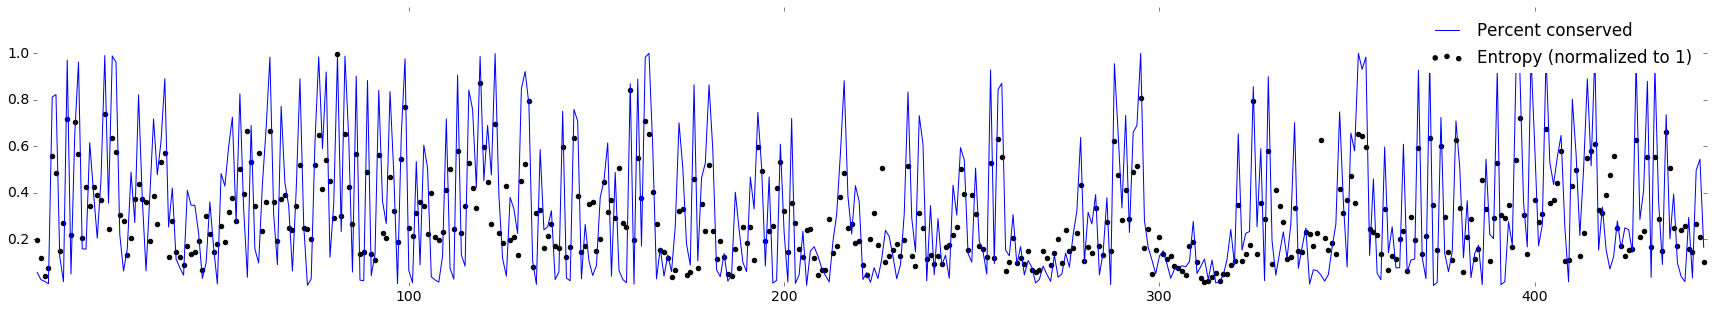

In [14]:
plt.figure( figsize=( 30, 5 ) ) 
plt.scatter( dat.sequence_pos, ( dat.Entropy / dat.Entropy.max()) ,color='k', label='Entropy (normalized to 1)' )
#plt.bar( clean_dat.sequence_pos, clean_dat.percents, lw=0, color='blue', label='Percent conserved' ) 
plt.plot( clean_dat.sequence_pos, clean_dat.percents, color='blue', label='Percent conserved' ) 

plt.xlim( 0, 446 ) 
plt.ylim( 0, 1.2 ) 
plt.xticks( [ 100, 200, 300, 400 ] ) 
plt.yticks( [ 0.2, 0.4, 0.6, 0.8, 1. ] ) 
plt.legend()
plt.show()

## Figure 2: heat map of tm, kcat, km, and kcatkm 

In [15]:
# figure 2: heat map 
from numpy import log10

heatmap_cols = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm' ] 
heatmap_data = df[ heatmap_cols ].copy()

heatmap_data['n_tm'] = heatmap_data.tm - 39.6
heatmap_data['n_kcat'] = log10( heatmap_data.kcat / 880 ) 
heatmap_data['n_km'] = log10( heatmap_data.km / 5.05 )
heatmap_data['n_kcatkm'] = log10( heatmap_data.kcatkm / 174000 )  
heatmap_data['n_expr'] = heatmap_data.expression 

heatmap_data.replace( [ -inf ], -5, inplace=True )  
heatmap_data.sample( 5 )

,expression,tm,kcat,km,kcatkm,n_tm,n_kcat,n_km,n_kcatkm,n_expr
mutant,,,,,,,,,,
Y18A,1,37.2,197.0,31.55,6230.0,-2.4,-0.650016,0.795708,-1.446061,1
T296E,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
R240K,1,39.3,898.0,17.67,50829.0,-0.3,0.008794,0.543945,-0.534438,1
S16A,1,NaN,154.0,14.01,10997.0,NaN,-0.756962,0.443147,-1.199275,1
W325G,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
img_cols = [ 'n_expr', 'n_tm', 'n_kcat', 'n_km', 'n_kcatkm' ]
heatmap = heatmap_data[ img_cols ].copy().replace( [-inf,inf], -5 )  
heatmap.loc[ 'BglB' ] = ( 1, 0, 0, 0, 0 )  

print heatmap.sample( 5 ) 

        n_expr  n_tm    n_kcat      n_km  n_kcatkm
mutant                                            
N220A        1  -1.0 -0.337028  0.308279 -0.644778
D403A        0   NaN       NaN       NaN       NaN
W399S        1   NaN       NaN       NaN -4.240549
N404A        1   2.4 -2.342423  0.270760 -2.646157
E164R        1   NaN       NaN       NaN       NaN


([<matplotlib.axis.XTick at 0x10700f850>,
 <a list of 10 Text xticklabel objects>)

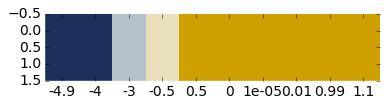

In [17]:
# recapitulate heat map colors from PLOS paper 

levels = [ -5, -2.5, -0.5, 0.5, 2.5, 5 ]

colors = [


( 0.11, .19, .36 ), # deep blue
#( .46, .57, .66 ), # medium blue
( .71, .76, .80 ), # light blue 

( .92, .92, .92 ), # grey 

( .92, .88, .74 ), # light yellow
#( .88, .80, .51 ), # medium yellow 
 ( .81, .63, 0. ), # if above 1, use this same color 

   
]


cmap, _ = mcolors.from_levels_and_colors( levels, colors,  )
cmap.set_bad( 'red', alpha=1 ) # color for missing values 

import numpy as np 

L = [ -4.9, -4, -3, -.5, .5, 0, 0.00001, 0.01, .99, 1.1 ]
my_array = np.array( [
        L,
        L,
    ] )

plt.imshow( my_array, interpolation='none', cmap=cmap )
plt.xticks( range( len( L ) ), L )

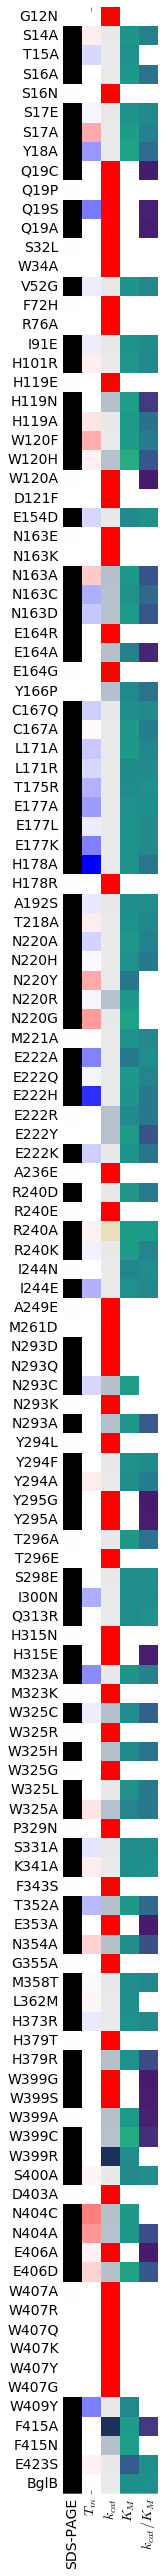

In [18]:
# heat map columns 

plt.figure( figsize=(18,36) ) 
plt.subplots_adjust(left=-11.8)
#plt.subplots_adjust(left=-11.46)
rc('axes', edgecolor='none')

font = { 'size': 14 }
rc('font', **font)

plt.subplot( 1, 6, 1 )
plt.imshow( heatmap[ ['n_expr'] ], interpolation='none', cmap='Greys' ) 
plt.tick_params( length=0 ) 
plt.xticks( [ 0 ], [ 'SDS-PAGE' ], rotation='vertical' ); plt.yticks( [] ) 
plt.yticks( range( len( heatmap.index ) ), heatmap.index )
plt.tick_params( length=0 ) 
#plt.colorbar()

plt.subplot( 1, 6, 2 )
plt.imshow( heatmap[ ['n_tm'] ], interpolation='none', cmap='bwr', vmin=-6, vmax=6 ) 
plt.xticks( [ 0 ], [ '$T_m$' ], rotation='vertical' ); plt.yticks( [] ) 
#plt.colorbar()

plt.subplot( 1, 6, 3 )
plt.imshow( heatmap[ ['n_kcat'] ], interpolation='none', cmap=cmap, vmax=5, vmin=-5  ) 
plt.xticks( [ 0 ], [ '$k_{cat}$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 4 )
plt.imshow( heatmap[ ['n_km'] ], interpolation='none', cmap='viridis', vmax=5, vmin=-5  ) 
plt.xticks( [ 0 ], [ '$K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 5 )
plt.imshow( heatmap[ ['n_kcatkm'] ], interpolation='none', cmap='viridis', vmax=5, vmin=-5  ) 
plt.xticks( [ 0 ], [ '$k_{cat}/K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

#plt.subplot( 1, 6, 6 )
#plt.scatter( 0, 0 ) 
#plt.xticks( [ 0 ], [ '$k_{cat}/K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
#plt.tick_params( length=0 ) 

plt.tight_layout()
#plt.savefig( 'fig2/plt_out.png', dpi=300 ) 
plt.show() 

([<matplotlib.axis.XTick at 0x116350950>,
 <a list of 6 Text xticklabel objects>)

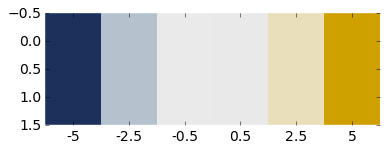

In [19]:
import numpy as np 

my_array = np.array( [
        levels,
        levels
    ] )

plt.imshow( my_array, interpolation='none', cmap=cmap )
plt.xticks( range( len( levels ) ), levels )

## Figure 3: drawings of mutants 

## Figure 4: colored by Tm 

## Figure 5: machine learning 

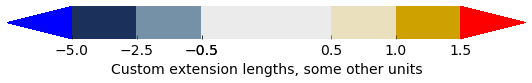

In [31]:
# color map 

from matplotlib import pyplot
import matplotlib as mpl

# Make a figure and axes with dimensions as desired.
fig = pyplot.figure(figsize=(8, 3))
ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

# The third example illustrates the use of custom length colorbar
# extensions, used on a colorbar with discrete intervals.
cmap = mpl.colors.ListedColormap(
    
[( 0.11, .19, .36 ), # deep blue
( .46, .57, .66 ), # medium blue
( .71, .76, .80 ), # light blue 
( .92, .92, .92 ), # grey 
( .92, .88, .74 ), # light yellow
( .88, .80, .51 ), # medium yellow 
( .81, .63, 0. )])

cmap.set_over((1., 0., 0.))
cmap.set_under((0., 0., 1.))

bounds = [-5., -2.5, -.5, -.5, .5, 1, 1.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap,
                                norm=norm,
                                boundaries=[-10] + bounds + [10],
                                extend='both',
                                # Make the length of each extension
                                # the same as the length of the
                                # interior colors:
                                extendfrac='auto',
                                ticks=bounds,
                                spacing='uniform',
                                orientation='horizontal')
cb3.set_label('Custom extension lengths, some other units')
pyplot.show()

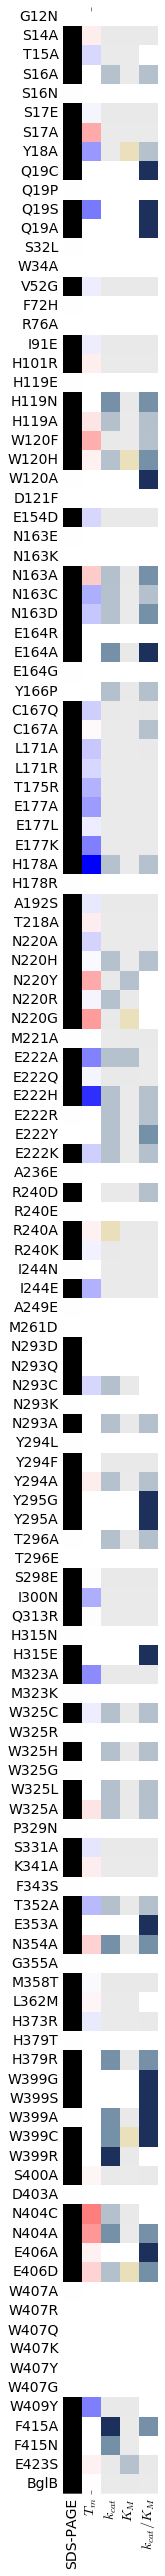

In [35]:
# heat map columns 

plt.figure( figsize=(18,36) ) 
plt.subplots_adjust(left=-11.8)
#plt.subplots_adjust(left=-11.46)
rc('axes', edgecolor='none')

font = { 'size': 14 }
rc('font', **font)

plt.subplot( 1, 6, 1 )
plt.imshow( heatmap[ ['n_expr'] ], interpolation='none', cmap='Greys' ) 
plt.tick_params( length=0 ) 
plt.xticks( [ 0 ], [ 'SDS-PAGE' ], rotation='vertical' ); plt.yticks( [] ) 
plt.yticks( range( len( heatmap.index ) ), heatmap.index )
plt.tick_params( length=0 ) 
#plt.colorbar()

plt.subplot( 1, 6, 2 )
plt.imshow( heatmap[ ['n_tm'] ], interpolation='none', cmap='bwr', vmin=-6, vmax=6 ) 
plt.xticks( [ 0 ], [ '$T_m$' ], rotation='vertical' ); plt.yticks( [] ) 
#plt.colorbar()

plt.subplot( 1, 6, 3 )
plt.imshow( heatmap[ ['n_kcat'] ], interpolation='none', cmap=cmap, vmax=5, vmin=-5  ) 
plt.xticks( [ 0 ], [ '$k_{cat}$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 4 )
plt.imshow( heatmap[ ['n_km'] ], interpolation='none', cmap=cmap, vmax=5, vmin=-5  ) 
plt.xticks( [ 0 ], [ '$K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 5 )
plt.imshow( heatmap[ ['n_kcatkm'] ], interpolation='none', cmap=cmap, vmax=5, vmin=-5  ) 
plt.xticks( [ 0 ], [ '$k_{cat}/K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

#plt.subplot( 1, 6, 6 )
#plt.scatter( 0, 0 ) 
#plt.xticks( [ 0 ], [ '$k_{cat}/K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
#plt.tick_params( length=0 ) 

plt.tight_layout()
#plt.savefig( 'fig2/plt_out.png', dpi=300 ) 
plt.show() 